<a href="https://colab.research.google.com/github/tiagoflorin/DataScience1/blob/Clase_9/Copia_de_Clase_U9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Feature Selection : Wrapper Methods

El proceso de selección de características se basa en un algoritmo de aprendizaje automático específico que intentamos encajar en un conjunto de datos determinado.

Sigue un enfoque de búsqueda codiciosa al evaluar todas las posibles combinaciones de características contra el criterio de evaluación. El criterio de evaluación es simplemente la medida del desempeño que depende del tipo de problema, por ejemplo, para el criterio de evaluación de regresión puede ser p-valores, R-cuadrado, R-cuadrado ajustado, de manera similar para la clasificación el criterio de evaluación puede ser accuracy, precision, recall, puntaje f1, etc. Finalmente, selecciona la combinación de características que da el resultados óptimos para el algoritmo de aprendizaje automático especificado.

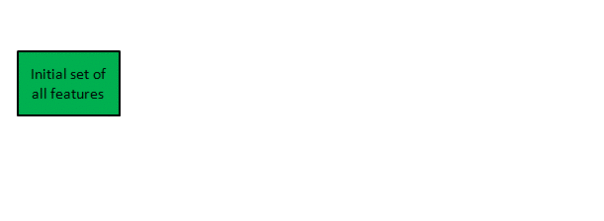

Los metodos mas comunes son:
1. Forward Selection
2. Backward elimination
3. Bi-directional elimination (stepwise)

Ahora analicemos los métodos con un ejemplo del conjunto de datos de precios de la vivienda de Boston disponible en sklearn. El conjunto de datos contiene 506 observaciones de 14 características diferentes. El conjunto de datos se puede importar utilizando la función load_boston() disponible en el módulo sklearn.datasets.

In [ ]:
import pandas as pd

boston = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/refs/heads/master/BostonHousing.csv")
print(boston.shape)         # dataset dimension
print(boston.columns)      # nombre feature

(506, 14)
Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')


Convirtamos estos datos sin procesar en un marco de datos que incluya la variable de destino y los datos reales junto con los nombres de las funciones.

In [ ]:
import pandas as pd
X = boston.drop(columns=["medv"], axis=1)       # feature matrix
y = boston['medv']               # target feature
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [ ]:
X

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48


In [ ]:
y

,medv
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


## Forward selection

En la selección hacia adelante, comenzamos con un modelo nulo y luego comenzamos a ajustar el modelo con cada característica individual una a la vez y seleccionamos la característica con el valor p mínimo. Ahora ajuste un modelo con dos características probando combinaciones de la característica seleccionada anteriormente con todas las demás características restantes. Vuelva a seleccionar la función con el valor p mínimo. Ahora ajuste un modelo con tres características probando combinaciones de dos características previamente seleccionadas con otras características restantes. Repita este proceso hasta que tengamos un conjunto de características seleccionadas con un valor p de características individuales menor que el nivel de significancia.

En resumen, los pasos para la técnica de selección hacia adelante son los siguientes:

1. Elija un nivel de significancia (por ejemplo, SL = 0.05 con un 95% de confianza).

2. Ajuste todos los modelos de regresión simple posibles considerando una característica a la vez. Los modelos totales 'n' son posibles. Seleccione la característica con el valor p más bajo.

3. Ajuste todos los modelos posibles con una característica adicional agregada a las características seleccionadas anteriormente.

4. Nuevamente, seleccione la función con un valor p mínimo. si $p_v <alpha$, vaya al Paso 3; de lo contrario, finalice el proceso.

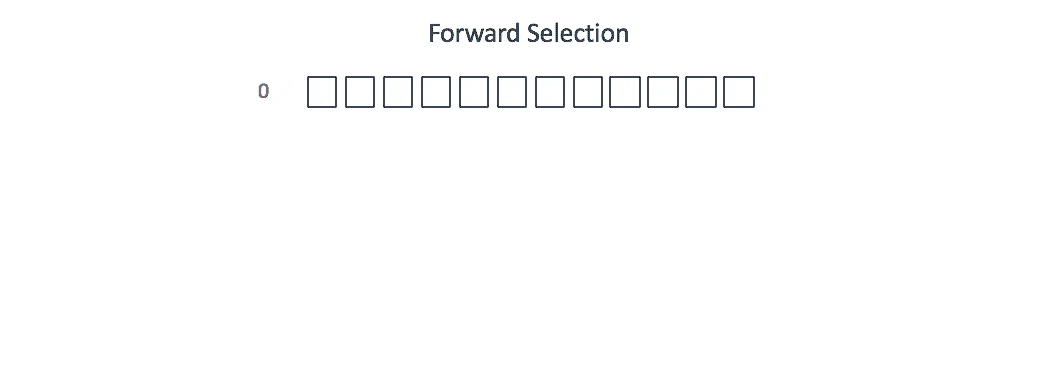

In [ ]:
# 1. Importar la librería necesaria
import statsmodels.api as sm
import pandas as pd # Asumo que pandas está siendo usado por la sintaxis `pd.Series` y `data.columns`

# 2. Definición de la función
def forward_selection(data, target, significance_level=0.01):
    """
    Realiza una selección de características hacia adelante (Forward Selection)
    basada en el p-valor utilizando Regresión Lineal (OLS) de statsmodels.

    Args:
        data (pd.DataFrame): DataFrame de pandas que contiene todas las
                             características predictoras potenciales.
        target (pd.Series): Serie de pandas que contiene la variable objetivo
                            o dependiente.
        significance_level (float, optional): El nivel de significancia (alfa)
                                              para determinar si una característica
                                              es estadísticamente significativa
                                              y debe ser añadida.
                                              Por defecto es 0.01 (1%).

    Returns:
        list: Una lista de los nombres de las columnas (características)
              seleccionadas como las mejores según el criterio.
    """

    # 3. Inicialización de listas de características
    initial_features = data.columns.tolist() # Lista con TODAS las características disponibles al inicio.
    best_features = [] # Lista vacía donde iremos añadiendo las características seleccionadas.

    # 4. Bucle principal: Iterar mientras haya características por considerar
    while (len(initial_features) > 0): # Realmente, la condición de salida principal es el 'break' interno.

        # 5. Identificar características restantes para probar
        remaining_features = list(set(initial_features) - set(best_features))
        # Calcula las características que están en 'initial_features' PERO NO en 'best_features'.
        # Es decir, las candidatas a ser añadidas en esta iteración.
        # Usar sets es eficiente para esta operación de diferencia.

        # 6. Almacenar p-valores de las candidatas
        new_pval = pd.Series(index=remaining_features, dtype=float)
        # Crea una Serie de Pandas para guardar el p-valor de cada característica restante.
        # El índice de la Serie serán los nombres de las características restantes.

        # 7. Bucle interno: Probar cada característica restante
        for new_column in remaining_features:
            # Para cada característica candidata (`new_column`):

            # 8. Preparar los datos para el modelo
            # Combina las características ya seleccionadas (`best_features`) con la nueva candidata (`new_column`).
            features_to_test = best_features + [new_column]

            # Selecciona las columnas correspondientes del DataFrame `data`.
            X_test = data[features_to_test]

            # Añade una constante (intercepto) al conjunto de predictores.
            # Esto es FUNDAMENTAL para la mayoría de los modelos de regresión lineal (OLS).
            # Sin esto, la recta de regresión estaría forzada a pasar por el origen (0,0).
            X_test_const = sm.add_constant(X_test)

            # 9. Ajustar el modelo OLS
            # Crea y ajusta un modelo de Mínimos Cuadrados Ordinarios (OLS).
            # target: es la variable dependiente (Y).
            # X_test_const: son las variables independientes (X), incluyendo el intercepto.
            model = sm.OLS(target, X_test_const).fit()

            # 10. Extraer y guardar el p-valor de la nueva característica
            # `model.pvalues` contiene los p-valores para TODAS las variables en el modelo (incluyendo el intercepto y las 'best_features').
            # Nos interesa específicamente el p-valor de la `new_column` que acabamos de añadir y probar.
            new_pval[new_column] = model.pvalues[new_column]

        # 11. Encontrar la característica más significativa de esta iteración
        min_p_value = new_pval.min()
        # Busca el valor mínimo en la Serie `new_pval`. Este es el p-valor más bajo
        # entre todas las características candidatas probadas en esta iteración.

        # 12. Decidir si añadir la mejor característica encontrada
        if (min_p_value < significance_level):
            # Si el p-valor más bajo es menor que el umbral de significancia:

            # 13. Añadir la característica a la lista de mejores
            best_feature_name = new_pval.idxmin() # Obtiene el NOMBRE de la característica con el p-valor mínimo.
            best_features.append(best_feature_name) # Añade ese nombre a la lista `best_features`.
            # El bucle `while` continuará para la siguiente iteración, buscando la próxima mejor característica.

        else:
            # 14. Detener el proceso si ninguna mejora es significativa
            # Si el p-valor más bajo NO es menor que el umbral de significancia,
            # significa que ninguna de las características restantes aporta una mejora
            # estadísticamente significativa al modelo (según el umbral definido).
            break # Rompe el bucle `while` principal.

    # 15. Devolver las características seleccionadas
    return best_features

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Esta función anterior acepta datos, variable objetivo y nivel de significancia como argumentos y devuelve la lista final de características significativas basadas en valores p a través de la selección hacia adelante.

In [ ]:
forward_selection(X,y)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  import sys


['LSTAT', 'RM', 'PTRATIO', 'DIS', 'NOX', 'CHAS', 'B', 'ZN']

# Implementacion usando funciones de Python


In [ ]:
!pip install mlxtend

In [ ]:
import sys
import joblib
sys.modules['sklearn.externals.joblib'] = joblib

In [ ]:
#Librerias
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression
# Sequential Forward Selection(sfs)
sfs = SFS(LinearRegression(),
          k_features=11,
          forward=True,
          floating=False,
          scoring = 'r2',
          cv = 0)

La función SequentialFeatureSelector() acepta los siguientes argumentos principales:

* LinearRegression() es un estimador de todo el proceso. Del mismo modo, puede ser cualquier algoritmo basado en clasificación.

* k_features indica el número de características que se seleccionarán. Puede ser cualquier valor aleatorio, pero el valor óptimo se puede encontrar analizando y visualizando las puntuaciones para diferentes números de características.

* argumentos hacia adelante y flotantes forward = Verdadero y floating = Falso son para la técnica de selección hacia adelante.

* El argumento de puntuación especifica el criterio de evaluación que se utilizará. Para problemas de regresión, solo hay una puntuación $r^2$ en la implementación predeterminada. De manera similar, para la clasificación, puede ser exactitud, precisión, recuperación, puntaje f1, etc.

* El argumento cv es para la validación cruzada usando k-fold.

In [ ]:
sfs.fit(X, y)
sfs.k_feature_names_     #Lista final de features

('crim',
 'zn',
 'chas',
 'nox',
 'rm',
 'dis',
 'rad',
 'tax',
 'ptratio',
 'b',
 'lstat')

# Backward selection

En la eliminación hacia atrás, comenzamos con el modelo completo (incluidas todas las variables independientes) y luego eliminamos la característica insignificante con el valor p más alto (> nivel de significancia). Este proceso se repite una y otra vez hasta que tenemos el conjunto final de características importantes.

En resumen, los pasos involucrados en la eliminación hacia atrás son los siguientes:

1. Elija un nivel de significancia (por ejemplo, SL = 0.05 con un 95% de confianza).

2. Se ajusta a un modelo completo que incluye todas las características.

3. Considere la característica con el valor p más alto. Si el valor p> nivel de significancia, vaya al Paso 4; de lo contrario, finalice el proceso.

5. Elimine el feature que se está considerando.

6. Ajustar un modelo sin esta función. Repita todo el proceso desde el paso 3.

Ahora hagamos lo mismo con los datos de precios de la vivienda en Boston.

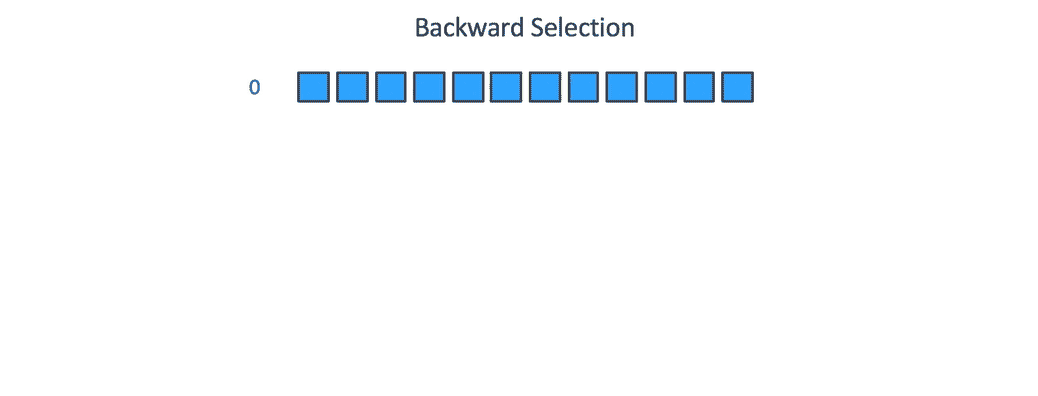

In [ ]:
# 2. Definición de la función
def backward_elimination(data, target, significance_level=0.05):
    """
    Realiza la Eliminación Hacia Atrás (Backward Elimination) de características
    basada en el p-valor utilizando Regresión Lineal (OLS) de statsmodels.

    El proceso comienza con todas las características y elimina iterativamente
    la menos significativa (mayor p-valor) hasta que todas las características
    restantes sean estadísticamente significativas por debajo del umbral dado.

    Args:
        data (pd.DataFrame): DataFrame de pandas que contiene todas las
                             características predictoras iniciales.
        target (pd.Series): Serie de pandas que contiene la variable objetivo
                            o dependiente.
        significance_level (float, optional): El nivel de significancia (alfa)
                                              utilizado como umbral para decidir
                                              si una característica debe ser eliminada.
                                              Si el p-valor más alto es MAYOR o IGUAL
                                              a este nivel, la característica se elimina.
                                              Por defecto es 0.05 (5%).

    Returns:
        list: Una lista de los nombres de las columnas (características)
              que permanecen en el modelo después del proceso de eliminación.
    """

    # 3. Inicializar la lista de características
    features = data.columns.tolist() # Comenzamos con TODAS las características disponibles en 'data'.

    # 4. Bucle principal: Iterar mientras haya características para evaluar
    while (len(features) > 0):
        # Este bucle continuará mientras queden características en nuestra lista 'features'.
        # En cada iteración, construiremos un modelo y decidiremos si eliminar una característica.

        # 5. Preparar los datos para el modelo (Añadir constante)
        features_with_constant = sm.add_constant(data[features])
        # Seleccionamos solo las columnas de 'data' que están actualmente en nuestra lista 'features'.
        # sm.add_constant() añade una columna de unos, que representa el término
        # de intercepción (constante o sesgo) en el modelo de regresión lineal.
        # Esto es crucial para que OLS estime correctamente la ordenada al origen.

        # 6. Ajustar el modelo OLS y obtener p-valores
        # Creamos el modelo de Mínimos Cuadrados Ordinarios (OLS)
        # target: variable dependiente (Y)
        # features_with_constant: variables independientes (X), incluyendo la constante.
        model = sm.OLS(target, features_with_constant)
        # Ajustamos el modelo a los datos
        results = model.fit()
        # Obtenemos los p-valores asociados a cada coeficiente estimado (incluyendo la constante)
        p_values = results.pvalues

        # 7. Excluir el p-valor de la constante
        p_values = p_values[1:] # IMPORTANTE: Eliminamos el primer p-valor, que corresponde
                                # a la constante (intercepto). Solo queremos evaluar la
                                # significancia de las características predictoras reales.
                                # Asume que la constante es siempre la primera fila/índice.

        # 8. Encontrar el p-valor máximo entre las características restantes
        max_p_value = p_values.max()
        # Buscamos el valor de p-valor más alto entre las características actuales.
        # Este p-valor corresponde a la característica menos estadísticamente significativa
        # en el modelo actual (la que tiene más probabilidad de no tener un efecto real).

        # 9. Decidir si eliminar la característica menos significativa
        if (max_p_value >= significance_level):
            # Si el p-valor más alto es MAYOR O IGUAL al umbral de significancia:
            # Esto significa que la característica menos significativa NO es lo
            # suficientemente significativa (según nuestro criterio alfa).

            # 10. Identificar y eliminar la característica
            excluded_feature = p_values.idxmax() # Obtiene el NOMBRE de la característica con el p-valor máximo.
            features.remove(excluded_feature)    # Elimina esa característica de nuestra lista 'features'.
                                                 # En la siguiente iteración del bucle while, el modelo
                                                 # se volverá a ajustar sin esta característica.
        else:
            # 11. Detener el proceso si todas las características restantes son significativas
            # Si el p-valor más alto es MENOR que el umbral de significancia:
            # Esto implica que TODAS las características actualmente en la lista 'features'
            # tienen p-valores por debajo del umbral, por lo que todas se consideran
            # estadísticamente significativas según nuestro criterio.
            break # Rompe el bucle 'while', ya no hay más características que eliminar.

    # 12. Devolver las características finales
    return features # Devuelve la lista 'features' que contiene los nombres de las
                   # características que sobrevivieron al proceso de eliminación.

In [ ]:
backward_elimination(X,y)

['CRIM',
 'ZN',
 'CHAS',
 'NOX',
 'RM',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT']

# Eliminación bidireccional (stepwise)
Es similar a la selección hacia adelante, pero la diferencia es que al agregar una nueva característica, también verifica la importancia de las características ya agregadas y si encuentra que alguna de las características ya seleccionadas es insignificante, simplemente elimina esa característica en particular mediante la eliminación hacia atrás.

Por lo tanto, es una combinación de selección hacia adelante y eliminación hacia atrás.

En resumen, los pasos involucrados en la eliminación bidireccional son los siguientes:

1. Elija un nivel de significancia para ingresar y salir del modelo (por ejemplo, $SL_{in}$ = 0.05 y $SL_{out} = 0.05$ con un 95% de confianza).

2. Realice el siguiente paso de la selección hacia adelante (la función recién agregada debe tener un valor $p <SL_{in}$ para ingresar).

3. Realice todos los pasos de la eliminacion hacia atras (cualquier caracteristica agregada previamente con valor $p> SL_{out}$ está lista para salir del modelo).

4. Repita los pasos 2 y 3 hasta que obtengamos un conjunto óptimo final de características.

Hagamos lo mismo con los datos de precios de la vivienda en Boston.

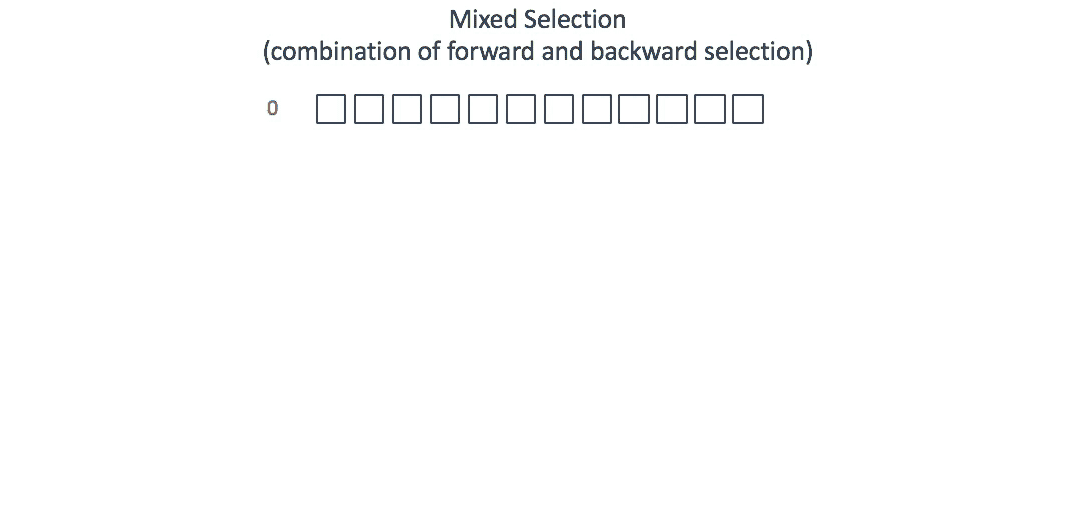

In [ ]:
# 2. Definición de la función de Selección Escalonada (Stepwise)
def stepwise_selection(data, target, SL_in=0.05, SL_out=0.05):
    """
    Realiza una Selección Escalonada (Stepwise Selection) de características
    combinando pasos hacia adelante y hacia atrás, basada en p-valores
    utilizando Regresión Lineal (OLS) de statsmodels.

    El proceso intenta añadir la característica más significativa (si cumple SL_in)
    y luego comprueba si alguna característica previamente añadida se ha vuelto
    no significativa (según SL_out) y debe ser eliminada.

    Args:
        data (pd.DataFrame): DataFrame de pandas con todas las características predictoras.
        target (pd.Series): Serie de pandas con la variable objetivo.
        SL_in (float, optional): Nivel de significancia para ENTRAR. Una característica
                                 candidata debe tener un p-valor MENOR a este umbral
                                 para ser añadida. Por defecto es 0.05 (5%).
        SL_out (float, optional): Nivel de significancia para SALIR/PERMANECER. Una característica
                                  *ya incluida* en el modelo debe tener un p-valor MENOR
                                  a este umbral para permanecer. Si su p-valor es MAYOR O IGUAL,
                                  es candidata a ser eliminada. Por defecto es 0.05 (5%).

    Returns:
        list: Una lista con los nombres de las columnas (características) seleccionadas.
    """

    # 3. Inicialización de listas de características
    initial_features = data.columns.tolist() # Lista con TODAS las características potenciales al inicio.
    best_features = [] # Lista vacía donde se almacenarán las características seleccionadas.

    # 4. Bucle principal: Iterar mientras haya características potenciales por considerar
    #    La condición real de salida son los 'break' internos.
    while (len(initial_features) > 0):

        # --- PASO HACIA ADELANTE (FORWARD STEP) ---
        # Objetivo: Encontrar la mejor característica *nueva* para añadir.

        # 5. Identificar características restantes (candidatas a añadir)
        remaining_features = list(set(initial_features) - set(best_features))
        # Calcula las características que están en 'initial_features' pero NO en 'best_features'.

        # 6. Almacenar p-valores de las candidatas
        new_pval = pd.Series(index=remaining_features, dtype=float) # Usar dtype=float es buena práctica
        # Serie para guardar el p-valor de cada característica restante cuando se añade *provisionalmente*.

        # 7. Probar cada característica restante una por una
        for new_column in remaining_features:
            # Construir un modelo temporal con las 'best_features' actuales + la nueva candidata
            features_to_test = best_features + [new_column]
            X_test = data[features_to_test]
            X_test_const = sm.add_constant(X_test) # Añadir constante/intercepto

            # Ajustar el modelo OLS
            model = sm.OLS(target, X_test_const).fit()

            # Extraer y guardar el p-valor *específico* de la característica candidata ('new_column')
            new_pval[new_column] = model.pvalues[new_column]

        # 8. Encontrar la característica candidata más significativa
        min_p_value = new_pval.min() # El p-valor más bajo entre todas las candidatas probadas.

        # 9. Decisión de Entrada: ¿Es la mejor candidata suficientemente significativa para ENTRAR?
        if (min_p_value < SL_in):
            # Si el p-valor más bajo está POR DEBAJO del umbral de entrada (SL_in)...

            # 10. Añadir la mejor característica candidata
            best_feature_name = new_pval.idxmin() # Obtener el nombre de la característica con min p-valor
            best_features.append(best_feature_name) # Añadirla a la lista de seleccionadas

            # --- PASO HACIA ATRÁS (BACKWARD STEP) ---
            # Objetivo: Después de añadir una, comprobar si alguna de las *ya incluidas*
            #           se ha vuelto no significativa y debe ser eliminada.

            # 11. Bucle de comprobación hacia atrás: Iterar mientras haya características seleccionadas
            while (len(best_features) > 0):
                # 12. Preparar datos con el conjunto *actual* de 'best_features'
                best_features_with_constant = sm.add_constant(data[best_features])

                # 13. Ajustar modelo OLS con las características actuales y obtener p-valores
                p_values = sm.OLS(target, best_features_with_constant).fit().pvalues
                p_values = p_values[1:] # Excluir el p-valor de la constante (intercepto)

                # 14. Encontrar el p-valor máximo entre las características *seleccionadas*
                max_p_value = p_values.max() # El p-valor más alto entre las que están DENTRO del modelo.

                # 15. Decisión de Salida: ¿Es la característica menos significativa aún lo suficientemente buena para PERMANECER?
                if (max_p_value >= SL_out):
                    # Si el p-valor más alto es MAYOR O IGUAL al umbral de salida (SL_out)...
                    # significa que esta característica ya no es significativa (quizás por
                    # la multicolinealidad introducida por la última característica añadida).

                    # 16. Identificar y eliminar la característica menos significativa
                    excluded_feature = p_values.idxmax() # Nombre de la característica con p-valor máximo
                    best_features.remove(excluded_feature) # Eliminarla de 'best_features'
                    # El bucle interno 'while' (paso 11) se repetirá para re-evaluar el modelo
                    # sin la característica recién eliminada.

                else:
                    # Si el p-valor más alto está POR DEBAJO de SL_out, todas las
                    # características actuales son suficientemente significativas para permanecer.
                    break # Salir del bucle de comprobación hacia atrás (paso 11).

        else:
            # 17. Detener el proceso si ninguna característica nueva es significativa para entrar
            # Si el p-valor mínimo de las características candidatas (paso 8) NO es menor
            # que SL_in, entonces ninguna nueva característica mejora significativamente el modelo.
            break # Salir del bucle principal (paso 4).

    # 18. Devolver las características finales seleccionadas
    return best_features # Devuelve la lista final de características que cumplieron
                         # los criterios de entrada y permanencia.

In [ ]:
stepwise_selection(X,y)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


['LSTAT',
 'RM',
 'PTRATIO',
 'DIS',
 'NOX',
 'CHAS',
 'B',
 'ZN',
 'CRIM',
 'RAD',
 'TAX']

In [ ]:
from sklearn.ensemble import RandomForestRegressor # o RandomForestClassifier
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

# Configurar SFS usando Random Forest como evaluador
sfs_rf = SFS(RandomForestRegressor(n_estimators=50, random_state=42, n_jobs=-1), # ¡Ajusta parámetros de RF!
             k_features='best', # O un número específico, ej. 10
             forward=True,      # O False para backward
             floating=False,
             scoring='r2',      # O 'neg_mean_squared_error', 'accuracy', 'f1', 'roc_auc', etc.
             cv=5,              # Muy recomendable!!
             n_jobs=-1)         # Paralelizar si es posible

# Ajustar SFS a tus datos
sfs_rf.fit(X, y)
selected_features_rf = list(sfs_rf.k_feature_names_)

In [ ]:
selected_features_rf

['chas', 'nox', 'rm', 'ptratio', 'lstat']

### SFS utiliza un metodo 'Greedy'

#### Ejemplo: Imagina que tenemos un conjunto de datos con solo 5 características (A, B, C, D, E) y queremos seleccionar las 3 mejores.

1. Paso 1: Seleccionar la 1ª mejor característica
  * Evaluar {A} -> Rendimiento_A
  * Evaluar {B} -> Rendimiento_B
  * Evaluar {C} -> Rendimiento_C
  * Evaluar {D} -> Rendimiento_D
  * Evaluar {E} -> Rendimiento_E

Supongamos que {C} da el mejor rendimiento.
  * Conjunto seleccionado = {C}
  * Número de evaluaciones hasta ahora: 5

2. Paso 2: Seleccionar la 2ª mejor característica (añadiéndola a {C})
  * Evaluar {C, A} -> Rendimiento_CA
  * Evaluar {C, B} -> Rendimiento_CB
  * Evaluar {C, D} -> Rendimiento_CD
  * Evaluar {C, E} -> Rendimiento_CE


Supongamos que {C, E} da el mejor rendimiento.
  * Conjunto seleccionado = {C, E}
  * Número de evaluaciones en este paso: 4. Total: 5 + 4 = 9

3. Paso 3: Seleccionar la 3ª mejor característica (añadiéndola a {C, E})
  * Evaluar {C, E, A} -> Rendimiento_CEA
  * Evaluar {C, E, B} -> Rendimiento_CEB
  * Evaluar {C, E, D} -> Rendimiento_CED

Supongamos que {C, E, B} da el mejor rendimiento.
  * Conjunto seleccionado final = {C, E, B}
  * Número de evaluaciones en este paso: 3. Total: 9 + 3 = 12

In [ ]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar RF con todas las features
rf_full = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf_full.fit(X_train, y_train)

# Obtener importancias
importances = rf_full.feature_importances_
feature_names = X_train.columns # Asumiendo X_train es un DataFrame

# Crear un DataFrame para visualización/selección
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

In [ ]:
importance_df

,Feature,Importance
5,rm,0.503845
12,lstat,0.309509
7,dis,0.060549
0,crim,0.038062
10,ptratio,0.016313
9,tax,0.015661
4,nox,0.015544
6,age,0.013840
11,b,0.012154
2,indus,0.007953


# Metricas algoritmos de clasificacion

In [ ]:
 from sklearn.datasets import load_breast_cancer
 from sklearn.ensemble import RandomForestClassifier
 from sklearn.metrics import ConfusionMatrixDisplay # Import ConfusionMatrixDisplay
 from sklearn.model_selection import train_test_split
 from sklearn import metrics
 import pandas as pd
 import numpy as np
 from matplotlib import pyplot as plt
 import seaborn as sns
 sns.set_style('whitegrid')

In [ ]:
# Cargamos dataset de cancer de mama
data = load_breast_cancer()
# definimos matriz de diseño X y vector respuesta y
X = pd.DataFrame(data['data'], columns=data['feature_names'])
y = abs(pd.Series(data['target'])-1)
# Separamos en entrenamiento/test en razon 80/20 %
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=1)
# Creamos un modelo Random Forest con parametros por defect
modelo = RandomForestClassifier(random_state=1)
modelo.fit(X_train, y_train)
# Obtenemos las predicciones del modelo con X_test
preds = modelo.predict(X_test)

<Figure size 1000x600 with 0 Axes>

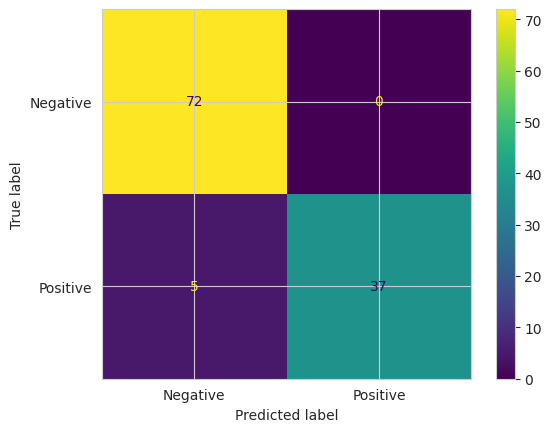

In [ ]:
plt.figure(figsize=(10,6))
cm = metrics.confusion_matrix(y_test, preds, labels=modelo.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=['Negative', 'Positive'])
disp.plot()
plt.show()

In [ ]:
confusion = metrics.confusion_matrix(y_test, preds)
confusion.ravel()

array([72,  0,  5, 37])

In [ ]:
accuracy = metrics.accuracy_score(y_test, preds)
accuracy

0.956140350877193

In [ ]:
# Precision se evalua para cada categoria
precision_positiva = metrics.precision_score(y_test, preds, pos_label=1)
precision_negativa = metrics.precision_score(y_test, preds, pos_label=0)
precision_positiva, precision_negativa

(1.0, 0.935064935064935)

In [ ]:
recall_sensibilidad = metrics.recall_score(y_test, preds, pos_label=1)
# 1 = Tiene la enfermedad.
# 0 = No tiene la enfermedad.
# Sensibilidad: De todas las personas que realmente están enfermas,
# ¿a qué porcentaje detectamos correctamente?
# Un modelo con alta sensibilidad no deja "escapar" a muchos enfermos.
recall_especificidad= metrics.recall_score(y_test, preds, pos_label=0)
# 1 = Tiene la enfermedad.
# 0 = No tiene la enfermedad.
# Especificidad: De todas las personas que realmente están sanas, ¿a qué porcentaje clasificamos correctamente como sanas? Un modelo con alta especificidad no da falsas alarmas (no le dice a la gente sana que está enferma).
# recall_sensibilidad, recall_especificidad

(0.8809523809523809, 1.0)

In [ ]:
f1_positivo = metrics.f1_score(y_test, preds, pos_label=1)
f1_negativo = metrics.f1_score(y_test, preds, pos_label=0)
f1_positivo, f1_negativo

(0.9367088607594937, 0.9664429530201343)

In [ ]:
# Todas las metricas en uno
print(metrics.classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        72
           1       1.00      0.88      0.94        42

    accuracy                           0.96       114
   macro avg       0.97      0.94      0.95       114
weighted avg       0.96      0.96      0.96       114



# Metrica algoritmos de regresion

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Carguemos un dataset de ejemplo
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)
diabetes_X

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286377, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04687948,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452837, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00421986,  0.00306441]])

In [ ]:
diabetes_y

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(diabetes_X,diabetes_y,test_size=0.2,random_state=2)
from sklearn.linear_model import LinearRegression
# crear el modelo
lr = LinearRegression()
# Ajustar el modelo con X_train y y_train
lr.fit(X_train,y_train)
# PRedecir con X_test
y_pred = lr.predict(X_test)

In [ ]:
from sklearn.metrics import mean_absolute_error
print("MAE",mean_absolute_error(y_test,y_pred))

MAE 45.21292481299676


Ventajas de MAE

- El MAE que obtiene está en la misma unidad que la variable de salida.
- Es más robusto a los valores atípicos.

Desventajas de MAE

- El gráfico de MAE no es diferenciable, por lo que debemos aplicar varios optimizadores, como el descenso de gradiente, que puede ser diferenciable.

In [ ]:
from sklearn.metrics import mean_squared_error
print("MSE",mean_squared_error(y_test,y_pred))

MSE 3094.4295991207027


Ventajas de MSE

- La gráfica de MSE es diferenciable, por lo que puede usarla fácilmente como una función de pérdida.

Desventajas de MSE

- El valor que obtiene después de calcular MSE es una unidad de salida al cuadrado. por ejemplo, la variable de salida está en metros (m), luego de calcular el MSE, la salida que obtenemos está en metros cuadrados.
- Si tiene valores atípicos en el conjunto de datos, los penaliza más y el MSE calculado es mayor. Entonces, en resumen, no es robusto a los valores atípicos que fueron una ventaja en MAE.

In [ ]:
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE 55.62759745954073


Ventajas de RMSE

- El valor de salida que obtiene está en la misma unidad que la variable de salida requerida, lo que facilita la interpretación de la pérdida.

Desventajas de RMSE

- No es tan resistente a los valores atípicos en comparación con MAE para realizar RMSE tenemos que NumPy función de raíz cuadrada sobre MSE.

In [ ]:
print("RMSE",np.log(np.sqrt(mean_squared_error(y_test,y_pred))))

RMSE 4.018679435298041


Esta métrica es muy útil cuando está desarrollando un modelo sin llamar a las entradas. En ese caso, la salida variará en gran escala.

Para controlar esta situación de RMSE, tomamos el registro del error de RMSE calculado y obtenemos como resultado RMSLE

In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test,y_pred)
print(r2)

0.4399387660024644


R2 es una métrica que indica el rendimiento de su modelo, no la pérdida en un sentido absoluto.

Por el contrario, MAE y MSE dependen del contexto como hemos visto, mientras que la puntuación R2 es independiente del contexto.
